# Further investigation in some of the clustering results

### Load packages

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import sys
from distinctipy import distinctipy



sys.path.append("..")
from Commen_Functions import get_score, get_score_df, merge_Results, load_sets

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import mannwhitneyu, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Load the CCLE Dataset

In [19]:
SETS = 1
df, df_normalized, Type_df = load_sets(1)
with open(f'/home/g0017139/UMCG_Thesis/Scripts/Results/TSet{SETS}/Merged_results.pkl', 'rb') as f:
    results_grid = pickle.load(f)
with open(f'/home/g0017139/UMCG_Thesis/Scripts/Results/TSet{SETS}/Merged_GridHDDC.pkl', 'rb') as f:
    bic_df = pickle.load(f)
with open(f'/home/g0017139/UMCG_Thesis/Scripts/Results/TSet{SETS}/MergedClustersHDDC.pkl', 'rb') as f:
    clustersHDDC = pickle.load(f)

### Check the different cancer types in this set

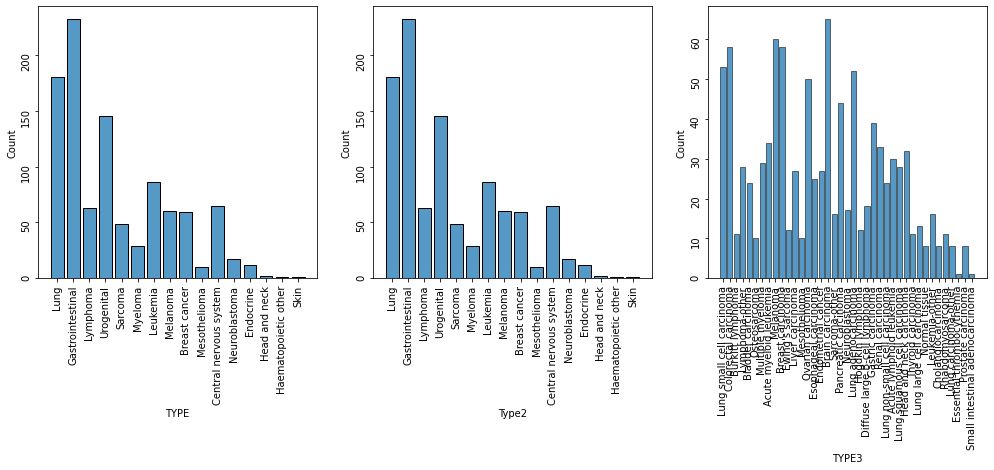

In [20]:
df, df_normalized, Type_df = load_sets(1)
fig, (ax1, ax2, ax3) = plt.subplots(1,3 ,figsize=(17,5))
sns.histplot(data=df, x="TYPE", shrink=.8, ax=ax1)
ax1.tick_params(labelrotation=90)
sns.histplot(data=df, x="Type2", shrink=.8, ax=ax2)
ax2.tick_params(labelrotation=90)
sns.histplot(data=df, x="TYPE3", shrink=.8, ax=ax3)
ax3.tick_params(labelrotation=90)
plt.show()

# Load the GPL570 Dataset

In [28]:
df, df_normalized, Type_df = load_sets(2)

### Check the different cancer types in this set

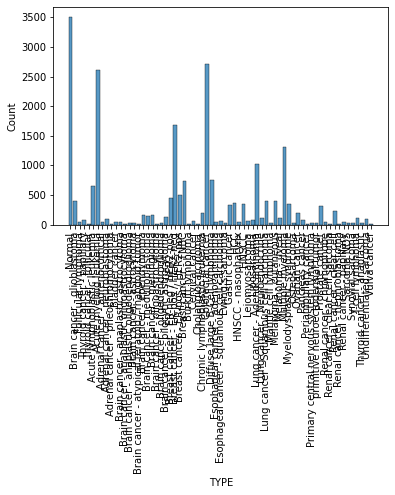

In [29]:
sns.histplot(data=Type_df, x="TYPE", shrink=.8)
plt.xticks(rotation=90)
plt.show()

### Get the precise sizes, only ICA Runs are done on the ones bigger than 100

In [30]:
df.groupby('TYPE').count()['2597'].sort_values()

TYPE
Cholangiocarcinoma                    4
Vulva cancer                          8
Periampullary cancer                  9
primitive neuroectodermal tumor      22
Bladder cancer                       39
Cervical cancer                      62
Pancreas cancer                      81
Thyroid cancer                       97
Esophageal cancer                    97
Adrenal cancer                      137
Ovarian cancer                      187
Renal cancer                        304
Prostate cancer                     308
Gastric cancer                      332
Myelodysplastic syndrome            342
Sarcoma                             344
HCC                                 364
HNSCC                               386
Melanoma                            504
Lymphoma                            961
Brain cancer                       1115
Multiple myeloma                   1316
Lung cancer                        1527
Colorectal cancer                  2710
Breast cancer                      

# Load the TCGA Dataset

In [31]:
df, df_normalized, Type_df = load_sets(4)

### Check the different cancer types in this set

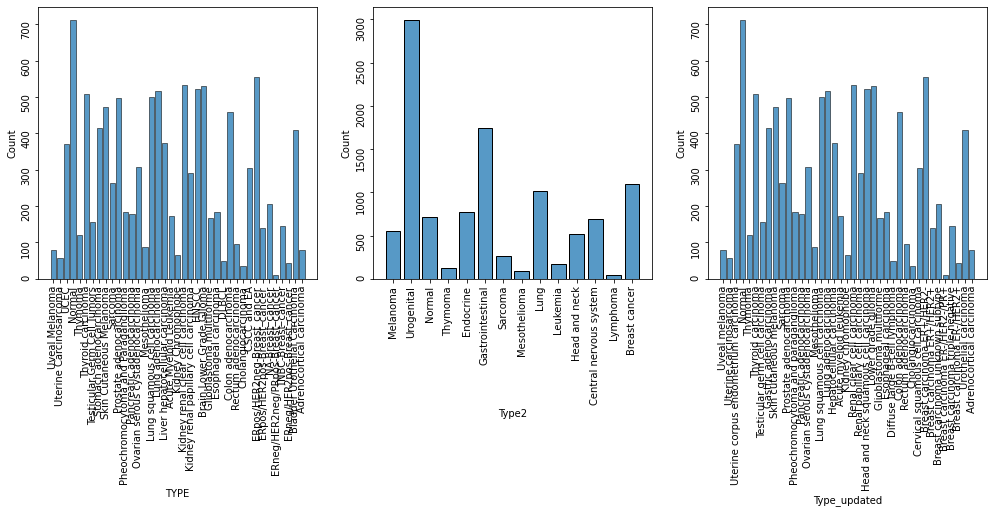

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3 ,figsize=(17,5))
sns.histplot(data=df, x="TYPE", shrink=.8, ax=ax1)
ax1.tick_params(labelrotation=90)
sns.histplot(data=df, x="Type2", shrink=.8, ax=ax2)
ax2.tick_params(labelrotation=90)
sns.histplot(data=df, x="Type_updated", shrink=.8, ax=ax3)
ax3.tick_params(labelrotation=90)
plt.show()

# Data preprocessing for ICA
## Cancer sets normalization
Normalizing all sets independently

In [11]:
loads = [(2, 'TYPE', -1, 'GPL570'), (1, 'TYPE', -3, 'CCLE'), (4, 'Type2', -5, 'TCGA')]
# Normalize all sets independently
for load in loads:
    # Load set
    df, df_normalized, Type_df = load_sets(load[0])
    # Loop over every cancer type
    for cancer_type, sub_df in df.groupby(load[1]):
        # Normalize it
        sub_df = sub_df.select_dtypes([np.number])
        scaler = StandardScaler()
        values = scaler.fit_transform(sub_df)
        cancer_norm_df = pd.DataFrame(values, columns = sub_df.columns, index=sub_df.index)
        cancer_norm_df.to_csv(f'/data/g0017139/ICA_files/{load[3]}/{cancer_type}.csv')




## Make the normalize experiment data

In [ ]:
# Load GPL570
df, _, __ = load_sets(2)
# Randomly select 200 samples
df = df.sample(n=2000, random_state=0)
df = df.select_dtypes([np.number])

# Three norm
## Sample set
scaler = StandardScaler()
values = scaler.fit_transform(df)
df_norm = pd.DataFrame(values, columns = df.columns, index=df.index)
df_norm.to_csv(f'/data/g0017139/ICA_files/MathExperiment/Three_Normalized/Math_ExpAll.csv')

## Subset 1
sub_df1 = df.iloc[:1000,]
scaler = StandardScaler()
values = scaler.fit_transform(sub_df1)
sub_df1_norm = pd.DataFrame(values, columns = sub_df1.columns, index=sub_df1.index)
sub_df1_norm.to_csv(f'/data/g0017139/ICA_files/MathExperiment/Three_Normalized/Math_Exp1.csv')

## Subset 2
sub_df2 = df.iloc[1000:,]
scaler = StandardScaler()
values = scaler.fit_transform(sub_df2)
sub_df2_norm = pd.DataFrame(values, columns = sub_df2.columns, index=sub_df2.index)
sub_df2_norm.to_csv(f'/data/g0017139/ICA_files/MathExperiment/Three_Normalized/Math_Exp2.csv')

# One norm
## Sample set
df_norm.to_csv(f'/data/g0017139/ICA_files/MathExperiment/One_Normalized/Math_ExpAll.csv')
## Subset 1
sub_df1 = df_norm.iloc[:1000,]
sub_df1.to_csv(f'/data/g0017139/ICA_files/MathExperiment/One_Normalized/Math_Exp1.csv')
## Subset 2
sub_df2 = df_norm.iloc[1000:,]
sub_df2.to_csv(f'/data/g0017139/ICA_files/MathExperiment/One_Normalized/Math_Exp2.csv')

# No norm
## Sample set
df.to_csv(f'/data/g0017139/ICA_files/MathExperiment/Non_Normalized/Math_ExpAll.csv')
## Subset 1
sub_df1 = df.iloc[:1000,]
sub_df1.to_csv(f'/data/g0017139/ICA_files/MathExperiment/Non_Normalized/Math_Exp1.csv')
## Subset 2
sub_df2 = df.iloc[1000:,]
sub_df2.to_csv(f'/data/g0017139/ICA_files/MathExperiment/Non_Normalized/Math_Exp2.csv')

## Make the random splits with one normalization
### 3 splits

In [10]:
# One norm
df_norm = pd.read_csv(f'/data/g0017139/ICA_files/MathExperiment/2_Split/One_Normalized/Math_ExpAll.csv', index_col=0)
sub_df1 = df_norm.iloc[:666,]
sub_df1.to_csv(f'/data/g0017139/ICA_files/MathExperiment/3_Split/Math_Exp1.csv')
sub_df2 = df_norm.iloc[666:1333,]
sub_df2.to_csv(f'/data/g0017139/ICA_files/MathExperiment/3_Split/Math_Exp2.csv')
sub_df3 = df_norm.iloc[1333:,]
sub_df3.to_csv(f'/data/g0017139/ICA_files/MathExperiment/3_Split/Math_Exp3.csv')

### 4 Splits

In [16]:
sub_df1 = df_norm.iloc[:500,]
sub_df1.to_csv(f'/data/g0017139/ICA_files/MathExperiment/4_Split/Math_Exp1.csv')
sub_df2 = df_norm.iloc[500:1000,]
sub_df2.to_csv(f'/data/g0017139/ICA_files/MathExperiment/4_Split/Math_Exp2.csv')
sub_df3 = df_norm.iloc[1000:1500,]
sub_df3.to_csv(f'/data/g0017139/ICA_files/MathExperiment/4_Split/Math_Exp3.csv')
sub_df4 = df_norm.iloc[1500:,]
sub_df4.to_csv(f'/data/g0017139/ICA_files/MathExperiment/4_Split/Math_Exp4.csv')

# See how the clustering algorithms performed

Can be done for every set (This is done in the dashboard).

In [5]:
SETS = 1
df, df_normalized, Type_df = load_sets(SETS)

In [6]:
# Generate unique a nd distinct html colors
def make_colors(df):
    cluster_colors = distinctipy.get_colors(max(15, len(set(df['Type']))),
                                colorblind_type='Deuteranomaly', n_attempts=10_000)
    cluster_colors = ['#%02x%02x%02x' % tuple((np.array(x)  * 250).astype(int)) for x in cluster_colors]

    color_mapper = dict(zip(set(df['Type']), cluster_colors))
    palette = []
    for key in sorted(color_mapper):
        palette.append(color_mapper[key])
    palette = sns.color_palette(palette)
    return cluster_colors, color_mapper, palette

In [7]:
# Make a countplot
def make_countplot(df, x, hue, pallete): 
    pallette = sns.set_palette(pallete)
    # Make the figure
    fig = plt.figure(figsize=(15,8))
    # Make the dataframe + countplot
    df = df.sort_values(hue)
    g = sns.countplot(x=x, hue=hue, palette=pallette, edgecolor=".6", 
                      data=df)
    g.get_legend().remove()
    g.set_title('Absoulte counts')
    # Calculate the counts
    fig2 = plt.figure(figsize=(15,8))
    counts = (df.groupby([hue])[x].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values(hue))
    # make the bars
    g1 = sns.barplot(x=x, y="percentage", hue=hue,
                     data=counts, palette=pallette, edgecolor=".6")

    g1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    g1.set_title('Relative counts')
    return fig, fig2

In [8]:
Entrez_Map = pd.read_csv('/data/g0017139/Set1/Entrezid_mapping_using_org_Hs_eg_db_03052021.txt',
                               sep=None, engine='python', header=0,
)
Entrez_Map.sort_values(['CHR_Mapping', 'BP_Mapping'], axis=0, inplace=True)

## See how the HDDC made two clustered for CCLE

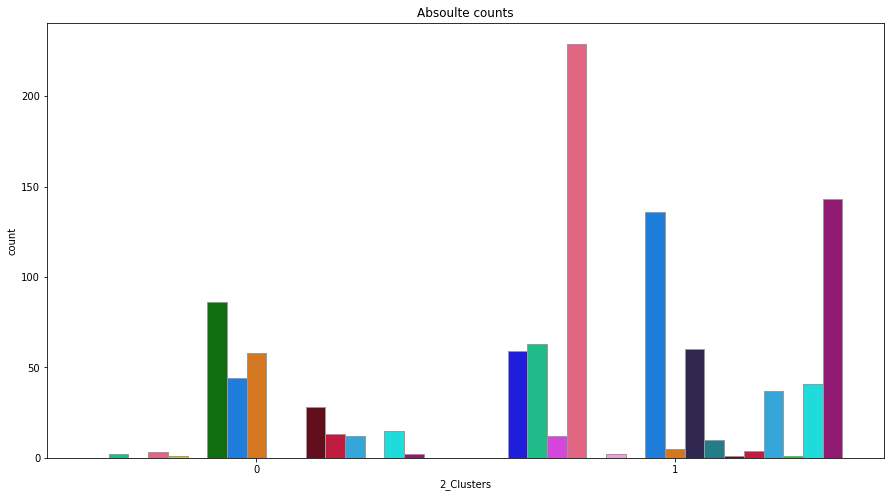

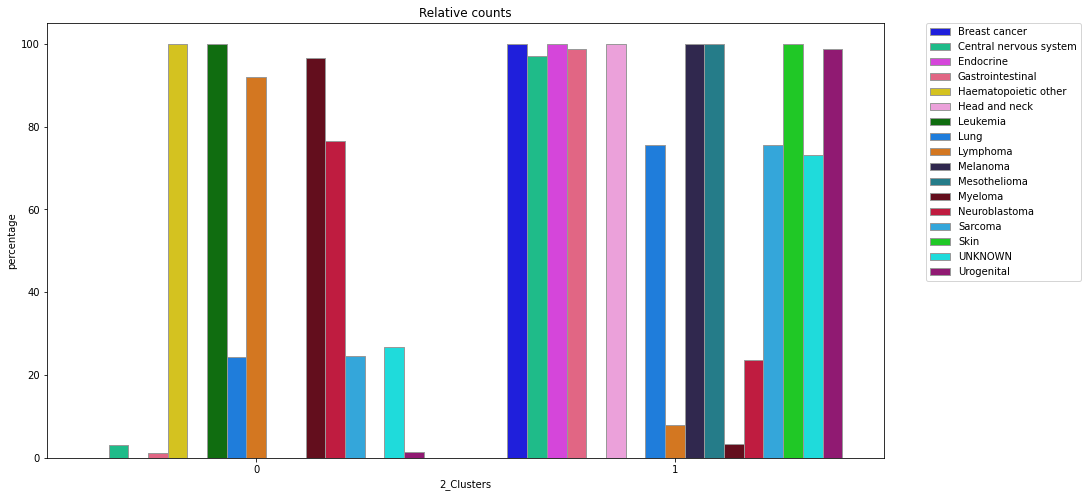

In [9]:
cluster_df = pd.read_csv(f"/home/g0017139/UMCG_Thesis/Scripts/Results/TSet{SETS}/HDDCClusters2.csv", index_col=0)
cluster_df.columns = ['2_Clusters']
cluster_df['2_Clusters'] = cluster_df['2_Clusters'] - 1
cluster_df['Type'] = df['TYPE'].values
cluster_df = cluster_df.fillna('UNKNOWN')
cluster_colors, color_mapper, palette = make_colors(cluster_df)
make_countplot(cluster_df, '2_Clusters', 'Type', palette)
plt.show()

There can be seen that this algorithm makes a distinqtion between blood and solid tumors

### Heatmap to show the same

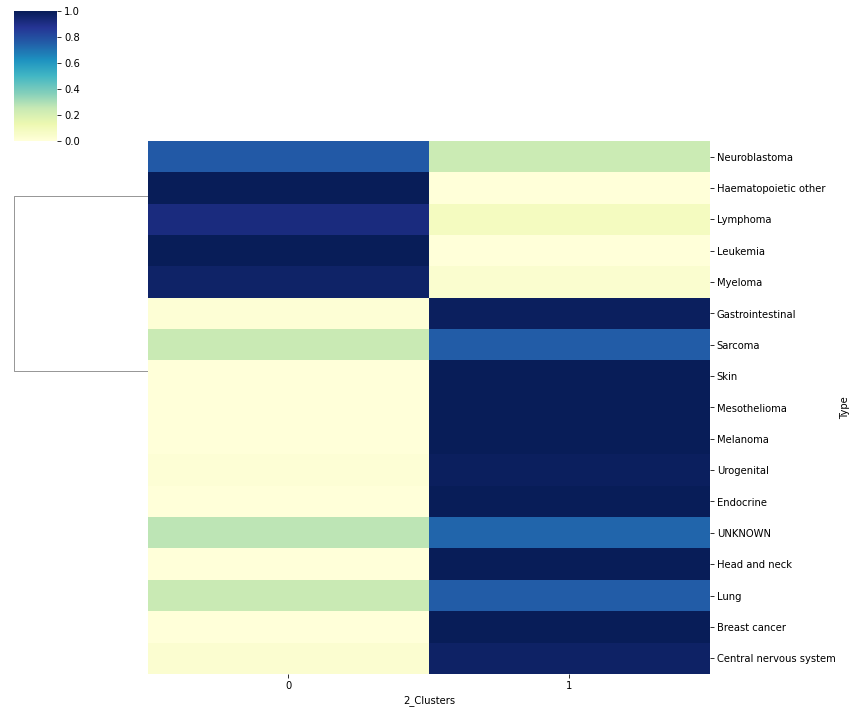

In [10]:
cluster_df['count'] = 1
count_df = cluster_df.groupby(['2_Clusters', 'Type']).sum().reset_index()
sum_df = cluster_df.groupby(['Type']).sum()
new_col = []
for index, row in count_df.iterrows():
    new_col.append(sum_df.loc[row['Type'],:]['count'])

count_df['Percentage'] = count_df['count'] / new_col
count_df = count_df.drop('count', axis=1)
data = pd.pivot_table(count_df, values='Percentage', index='Type', columns='2_Clusters', fill_value=0)
fig= sns.clustermap(data, method="ward", metric="correlation", col_cluster=False,  cmap="YlGnBu", figsize=(12,10))

This heatmap confirms the same believe
### Get the sizes of these clusters

In [11]:
cluster_df.groupby(['2_Clusters']).sum()

,count
2_Clusters,
0,264
1,803


# Investigate the HDDC eigenvectors

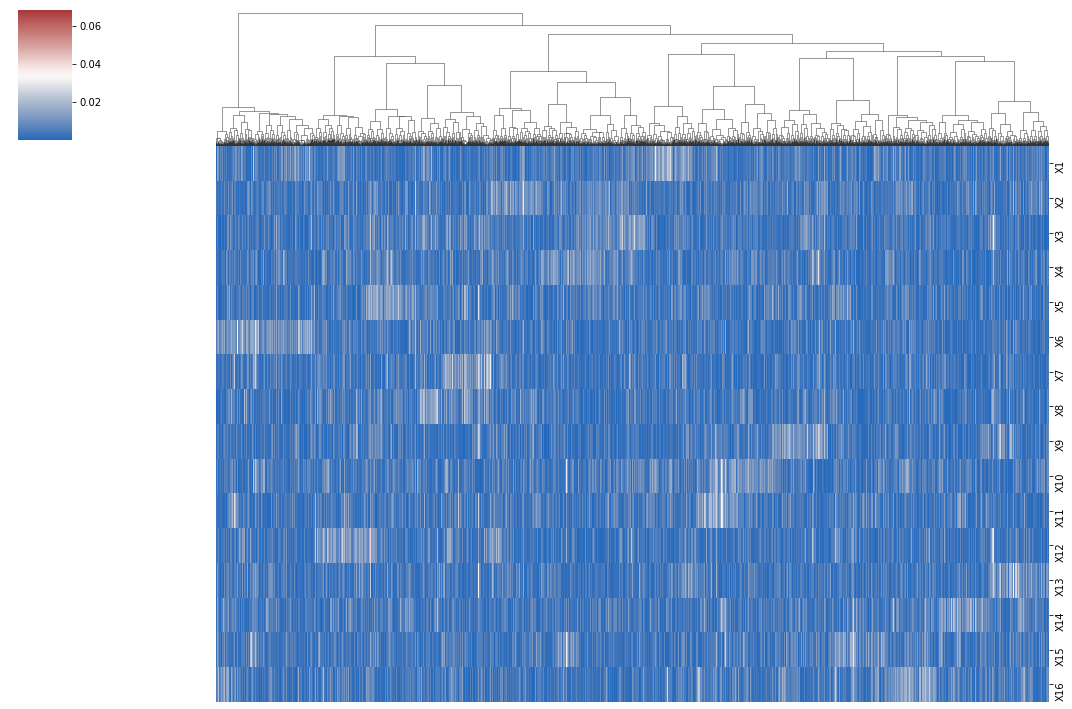

In [13]:
# Look at the blood type eigenvector
eigenvectors = pd.read_csv(f"/home/g0017139/UMCG_Thesis/Scripts/Results/TSet{SETS}/eigenvec0clusters2.csv", index_col=0)

sns.clustermap(eigenvectors.abs().T, xticklabels=False, method="ward", metric="correlation",
               row_cluster=False,  cmap="vlag", figsize=(15,10))
plt.show()

In [18]:
# Load the absolute eigenvectors and put the cancer type as index
eigenvectors = eigenvectors.abs()
if SETS == 1:
    eigenvectors.index = df.columns[:-3]
elif SETS == 2:
     eigenvectors.index = df.columns[:-1]
elif SETS == 3:
    eigenvectors.index = df.columns[:-5]

### Get the top 5 genes for every vector

In [19]:
def get_genes(eigenvectors):
    # Setup the lists
    important_genes = []
    ids = []
    # Cast the index to a string
    eigenvectors.index = [str(x) for x in eigenvectors.index]
    # Loop over every vector
    for column in eigenvectors:
        # Put the 5 largest weighted genes in the list
        values = eigenvectors[column].nlargest(5).index
        values = [str(x) for x in values]
        # Get the values
        for value in values:
            if value not in ids:
                ids.append(str(value))
            weight = eigenvectors[column][value]
            title = column.replace('X', 'Component ')
            important_genes.append((title,value,weight))
    # Cast them to names
    Entrez_Map['mapped_entrez_v1'] = Entrez_Map['mapped_entrez_v1'].astype(str)
    important_genes_df = Entrez_Map[Entrez_Map['mapped_entrez_v1'].isin(ids)]
    return important_genes, important_genes_df, ids


In [20]:
important_genes, important_genes_df, ids = get_genes(eigenvectors)

### Look how the top weights are distributed (Isn't used just as test)

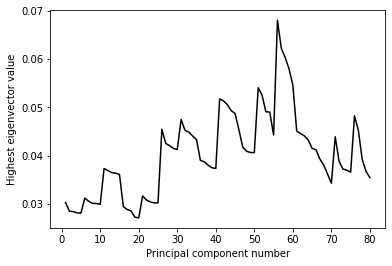

In [17]:
x_axis = []
y_axis = []
for i, x in enumerate(important_genes):
    x_axis.append(i + 1)
    y_axis.append(x[2])
sns.lineplot(x=x_axis, y=y_axis, color='black')
plt.xlabel('Principal component number')
plt.ylabel('Highest eigenvector value')
plt.show()

### The most important genes

In [22]:
print(' '.join(important_genes_df['SYMBOL'].astype(str).values))

HPCA ARMH1 ELAVL4 MNDA NHLH1 USH2A LINC00184 ACTN2 DPYSL5 TBR1 NEUROD1 IMPG2 GCSAM ZBTB38 PHOX2B LOC101929621 GYPA HAND2 HAND2-AS1 LINC02363 MIR3945HG HMHB1 POU4F3 LST1 RHAG PRDM1 LOC101928461 STX11 PPP1R17 PVRIG ACTL6B ADRB3 CA1 GNAQ LHX3 LCN6 IL2RA SH2D4B ENTPD1 PGGHG BGLT3 KCNC1 MS4A1 PHOX2A NFE2 IL26 ECRP RNASE2 LOC101927690 OTX2-AS1 LINC01467 EPB42 CCPG1 TNFRSF17 HS3ST4 SLC6A2 CCL22 LOXHD1 AZU1 ELAVL3 KLF1 PGLYRP2 CYP4F22 CD79A LIPI LINC00158 UBASH3A VPREB3 IL2RB MEI1 GATA1


In [23]:
important_genes

[('Component 1', '1995', 0.0302975401671415),
 ('Component 1', '3746', 0.0284938584734703),
 ('Component 1', '51412', 0.0283998698856204),
 ('Component 1', '1996', 0.0281402613362637),
 ('Component 1', '56896', 0.0280954066982921),
 ('Component 2', '608', 0.0312103120239362),
 ('Component 2', '2776', 0.0305509600220372),
 ('Component 2', '339541', 0.0301046585458255),
 ('Component 2', '4778', 0.0300821304005867),
 ('Component 2', '7940', 0.0299191449955132),
 ('Component 3', '79037', 0.0373292939142034),
 ('Component 3', '29802', 0.0369010508623951),
 ('Component 3', '257144', 0.0364689401332548),
 ('Component 3', '931', 0.0363699493492134),
 ('Component 3', '973', 0.0360963745648792),
 ('Component 4', '8676', 0.0294291869196555),
 ('Component 4', '9236', 0.0288504930737799),
 ('Component 4', '253461', 0.0285408753168877),
 ('Component 4', '639', 0.0272589760551655),
 ('Component 4', '150365', 0.0270955510181192),
 ('Component 5', '6005', 0.0316429873745602),
 ('Component 5', '759', 0.

### Get the gene weights for every sample for the top genes

In [26]:
# Cast the int to string
df.columns = [str(x) for x in df.columns]
get_cols = [str(x) for x in ids]
# Get the cancer tyep
get_cols.append('TYPE')
# add id together with the cluster labels
box_df = df[get_cols].copy()
box_df['Clusters'] = cluster_df['2_Clusters'].values
box_df = box_df.fillna('UNKNOWN')
box_df.head()

,1995,3746,51412,1996,56896,608,2776,339541,4778,7940,...,88,100309464,101928559,10716,50939,8022,7399,5459,TYPE,Clusters
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A01_436578.CEL,4.303095,5.812067,4.788792,6.003007,4.378398,3.430035,6.158824,3.346216,3.516778,4.136818,...,3.739944,3.588213,3.898526,3.905254,3.397980,4.159296,3.093636,3.172190,Lung,1
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A02_436580.CEL,4.041496,3.738800,3.861126,4.043252,3.683342,3.375136,6.019741,3.476560,3.623351,4.271767,...,3.926536,3.820259,4.198572,3.810689,3.588747,3.757295,3.333500,3.302401,Gastrointestinal,1
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A03_436582.CEL,10.306387,8.528508,8.740606,8.748578,7.076933,3.612511,8.662363,3.240735,3.591345,4.035197,...,3.307462,3.726193,4.033403,3.727789,3.109396,4.124082,3.249972,3.580199,Lung,0
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A05_436586.CEL,4.165277,4.096748,4.477073,4.056508,3.650628,10.130797,4.109991,3.504304,3.554286,4.490749,...,3.940234,3.900486,3.681835,3.897076,3.641921,4.129371,3.353367,3.291443,Lymphoma,0
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A06_436588.CEL,3.773930,4.399837,4.399676,3.756600,3.515234,5.405280,6.737081,3.640098,3.620519,8.168315,...,3.559782,3.551766,3.807660,3.662671,3.710802,4.244265,3.503947,3.246658,Lymphoma,0


## Test if the top weighted genes have a significantly different expression between cancer type

In [33]:
# Do a man_witney test between two different clusters
def man_witney(df, genes):
    # Loop over the genes
    for x in genes:
        # Get the different clusters
        a = df[df['Clusters'] == 0][x[1]].values
        b = df[df['Clusters'] == 1][x[1]].values
        # Perform the test
        p = mannwhitneyu(a, b)[1]
        # See if significant
        if p < 0.05:
            print(f'Gene \u001b[36m{x[1]}\x1b[0m has a p value of {p}')
        else:
            print(f'Gene {x[1]} has a p value of {p}')

            
# Do kurskall_test
def kruskal_test(df, genes):
    # Loop over genes
    sig_genes = []
    for x in genes:
        # Get all groups (clusters)
        groups = []
        for y in df['Clusters'].unique():
            groups.append(df[df['Clusters'] == y][x[1]].values)
        # Test difference between all groups
        p = kruskal(*groups)[1]
        if p < 0.05:
            sig_genes.append(x)
            print(f'Gene \u001b[36m{x[1]}\x1b[0m has a p value of {p}')
        else:
            print(f'Gene {x[1]} has a p value of {p}')
    return sig_genes

In [34]:
significant_genes = man_witney(box_df, important_genes)

Gene 1995 has a p value of 1.0617586040894356e-14
Gene 3746 has a p value of 2.617537443414517e-22
Gene 51412 has a p value of 2.1074606989546046e-10
Gene 1996 has a p value of 1.3827687165388284e-24
Gene 56896 has a p value of 0.0008799116104609591
Gene 608 has a p value of 1.5045005131301989e-21
Gene 2776 has a p value of 0.32084949834631604
Gene 339541 has a p value of 1.4969745303358816e-26
Gene 4778 has a p value of 0.4767753545737423
Gene 7940 has a p value of 4.939519967446381e-28
Gene 79037 has a p value of 7.101171770329413e-23
Gene 29802 has a p value of 6.73390404310444e-09
Gene 257144 has a p value of 2.5550377953615933e-25
Gene 931 has a p value of 2.8877191958191e-22
Gene 973 has a p value of 8.521489050677439e-17
Gene 8676 has a p value of 1.0091544264056103e-15
Gene 9236 has a p value of 8.506162858568382e-13
Gene 253461 has a p value of 2.0539797936920684e-31
Gene 639 has a p value of 0.061280252778978146
Gene 150365 has a p value of 2.3156802240565931e-26
Gene 6005 ha

## Most of the genes are significantly different between the different groups

Check which way they are different for for example gene 608

In [35]:
tukey = pairwise_tukeyhsd(endog=box_df['608'],
                          groups=box_df['Clusters'],
                          alpha=0.05)
results = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
results = results[results['reject'] == True]
results = results[((results['group1'] == 1) | (results['group2'] == 1))]
results

,group1,group2,meandiff,p-adj,lower,upper,reject
0,0,1,-2.4424,0.001,-2.6933,-2.1915,True


# Make a boxplot of the different gene expression between the clusters

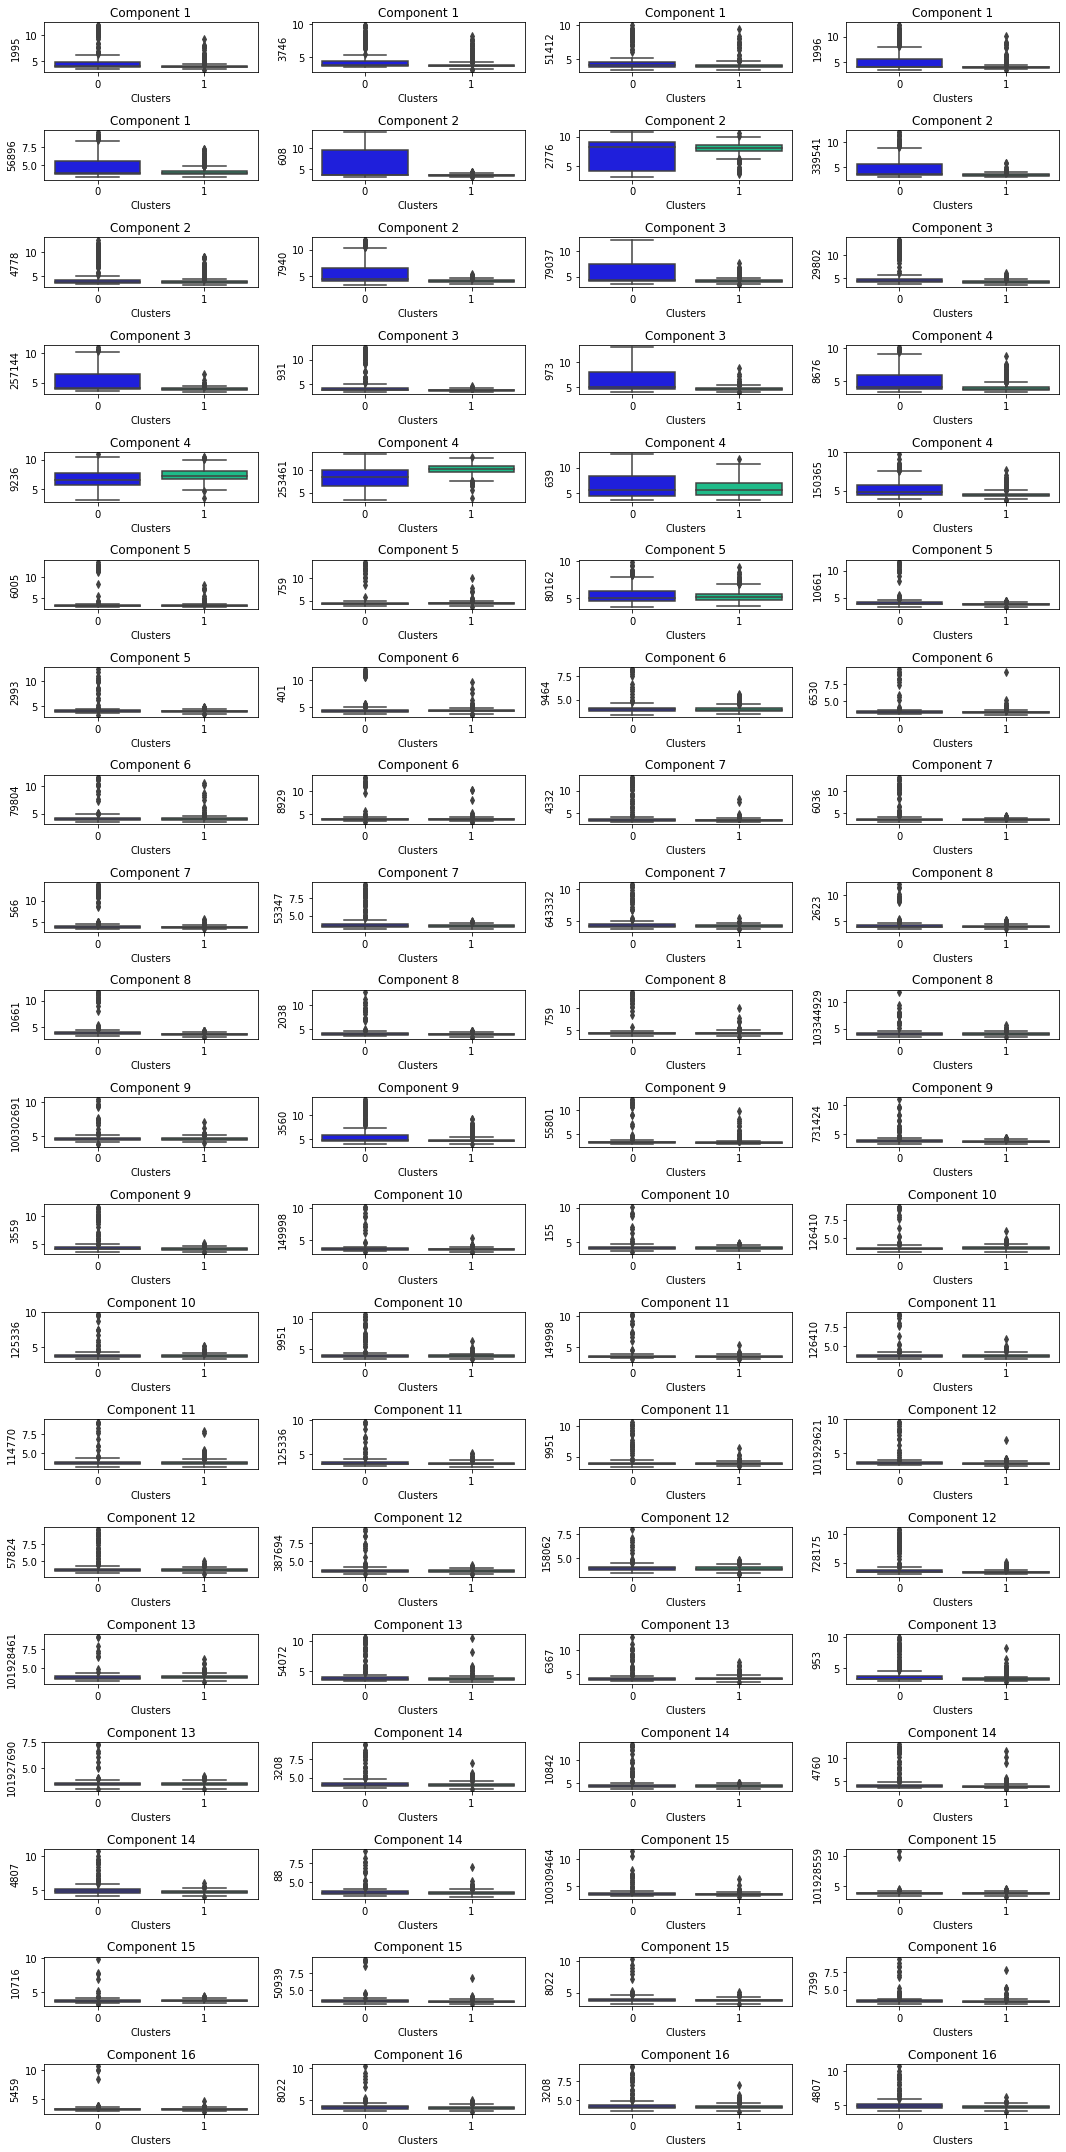

In [36]:
def make_boxplots(df, genes):
    # make a square figure
    size = len(genes) // 4
    if len(genes) % 4 != 0:
        size += 1
    # Loop over the genes
    fig, axs = plt.subplots(size,4, figsize=(15,30))
    i = 0
    axs = axs.ravel()
    # 
    for x in genes:
        sns.boxplot(x="Clusters", y=x[1], data=df,ax=axs[i])
        axs[i].set_title(x[0])
        i += 1
    fig.tight_layout()
make_boxplots(box_df, important_genes)

For some clusters a real fisual difference can also be spotted